## PS 05

### Yixin Lyu

In [2]:
import pandas as pd
import numpy as np
import textwrap
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

### 1 Bayes theorem–based classification

#### 1.1.1

In [43]:
emails = pd.read_csv("../data/lingspam-emails.csv", sep="\t")
for _, row in emails.sample(5).iterrows():
    print(f"Spam: {row['spam']}\nFile: {row['files']}\nMessage:\n{''.join(textwrap.wrap(row['message'], 80))}\n\n")

Spam: True
File: spmsgc142.txt
Message:
Subject: limited time reservation .  the most nasty , raunchy adult interactivewebsite on the internet today is = 46ree = 46or 1 week ! ! ! ! http : / /3461767994 / adult . html locker room xcitement ! ! see all this that was notavailable in the usa continent ( until now ) here = 46ree ! plus you will get .. . over 20 , 000 xxx videos over 50 live sex shows ! amsterdam sex shows !thousands of pictures xxx magazines . . comics . . . games & more ! all this =46or = 46ree = 46or 1 week ! join now ! go to : http : / / 3461767994 / adult .html


Spam: False
File: 9-1559msg1.txt
Message:
Subject: a . nunn , dutch orthography  new from holland academic graphics :anneke nunn dutch orthography a systematic investigation of the spelling ofdutch words this study offers a detailed and systematic account of dutchorthography and its relation to the linguistic system . it reveals aspects ofthe spelling system that were ignored or left implicit until now , andin

#### 1.2.1

In [4]:
# p_S_1: Pr(S = 1)
# p_S_0: Pr(S = 0)
# p_w_1: Pr(w = 1)
# p_w_0: Pr(w = 0)
# p_w_1_S_1: Pr(w = 1|S = 1)
# p_w_0_S_1: Pr(w = 0|S = 1)
# p_w_1_S_0: Pr(w = 1|S = 0)
# p_w_0_S_0: Pr(w = 0|S = 0)

#### 1.2.2

In [5]:
y = emails['spam']

majority = y.mode()[0]
naive_accuracy = (y == majority).mean()
naive_accuracy

0.8337366055997235

The accuracy should be around 0.834

#### 1.2.3

In [6]:
x = emails['message'].str.lower().str.contains("million").astype(int)

#### 1.2.4

In [7]:
p_S_1 = y.mean()
p_S_0 = 1 - p_S_1
print(f"Pr(S = 1): {p_S_1}")
print(f"Pr(S = 0): {p_S_0}")

Pr(S = 1): 0.16626339440027654
Pr(S = 0): 0.8337366055997235


#### 1.3.1

In [8]:
p_w_1 = x.mean()
p_w_0 = 1 - p_w_1
print(f"Pr(w = 1): {p_w_1}")
print(f"Pr(w = 0): {p_w_0}")

Pr(w = 1): 0.04839267196681645
Pr(w = 0): 0.9516073280331836


#### 1.3.2

In [9]:
p_w_1_S_1 = (x[y == 1]).mean()
p_w_1_S_0 = (x[y == 0]).mean()
print(f"Pr(w = 1|S = 1): {p_w_1_S_1}")
print(f"Pr(w = 1|S = 0): {p_w_1_S_0}")

Pr(w = 1|S = 1): 0.24116424116424118
Pr(w = 1|S = 0): 0.009950248756218905


#### 1.3.3

In [10]:
p_S_1_w_1 = (p_w_1_S_1 * p_S_1) / p_w_1
p_S_1_w_0 = (p_w_1_S_0 * p_S_1) / p_w_0
print(f"Pr(S = 1|w = 1): {p_S_1_w_1}")
print(f"Pr(S = 1|w = 0): {p_S_1_w_0}")

p_S_0_w_1 = 1 - p_S_1_w_1
p_S_0_w_0 = 1 - p_S_1_w_0
print(f"Pr(S = 0|w = 1): {p_S_0_w_1}")
print(f"Pr(S = 0|w = 0): {p_S_0_w_0}")

Pr(S = 1|w = 1): 0.8285714285714287
Pr(S = 1|w = 0): 0.001738492427076387
Pr(S = 0|w = 1): 0.17142857142857126
Pr(S = 0|w = 0): 0.9982615075729236


#### 1.3.4

The outcomes of a given occurrence that are exhaustive and mutually exclusive are represented by probabilities that add up to one. In this situation, Pr(S = 1|w = 1) and Pr(S = 0|w = 1) must add up to one since an email containing the term "million" can only be considered spam or not. Pr(S = 1|w = 0) and Pr(S = 0|w = 0) are equivalent. Probabilities like Pr(w = 1|S = 1) and Pr(w = 1|S = 0), on the other hand, do not have to add up to one since they do not represent all possible outcomes for a particular event. For example, an email including the word "million" may be considered spam, but so might any other word.

#### 1.4.1

In [11]:
y_pred = (p_S_1_w_1 > 0.5) * x + (p_S_1_w_0 > 0.5) * (1 - x)

#### 1.4.2

In [12]:
confusion = confusion_matrix(y, y_pred)
accuracy = accuracy_score(y, y_pred)
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)

print("Confusion Matrix:")
print(confusion)
print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")

Confusion Matrix:
[[2388   24]
 [ 365  116]]
Accuracy: 0.8655375043207743
Precision: 0.8285714285714286
Recall: 0.24116424116424118


#### 1.4.3

The priors (Pr(S = 1) and Pr(S = 0)) and conditional probabilities (Pr(w = 1|S = 1), Pr(w = 1|S = 0), Pr(S = 1|w = 1), and Pr(S = 1|w = 0)) are computed during the model training stages. The model is described by these probabilities. We employ the trained model in two stages: first, we use these probabilities to forecast whether each email is spam or not, and then we calculate the confusion matrix, accuracy, precision, and recall to assess the model's performance. The set of computed probabilities that we employ in this instance to generate predictions is known as the trained model.

#### 1.5.1

In [45]:
def word_performance(word):
    x = emails.message.str.lower().str.contains(word)
    
    p_w_1 = x.mean()
    p_w_0 = 1 - p_w_1
    p_w_1_S_1 = (x[y == 1]).mean()
    p_w_1_S_0 = (x[y == 0]).mean()
    p_w_0_S_1 = 1 - p_w_1_S_1
    p_S_1_w_1 = (p_w_1_S_1 * p_S_1) / p_w_1
    p_S_1_w_0 = (p_w_0_S_1 * p_S_1) / p_w_0
    
    y_pred = (p_S_1_w_1 > 0.5) * x + (p_S_1_w_0 > 0.5) * (1 - x)
    
    confusion = confusion_matrix(y, y_pred)
    accuracy = accuracy_score(y, y_pred)
    precision = precision_score(y, y_pred)
    recall = recall_score(y, y_pred)
    
    print(f"Word: {word}")
    print("Confusion Matrix:")
    print(confusion)
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print()
    
words = ["conference", "the", "offer", "free", "lottery"]
for word in words:
    word_performance(word)

Word: conference
Confusion Matrix:
[[2412    0]
 [ 481    0]]
Accuracy: 0.8337366055997235
Precision: 0.0
Recall: 0.0

Word: the
Confusion Matrix:
[[2412    0]
 [ 481    0]]
Accuracy: 0.8337366055997235
Precision: 0.0
Recall: 0.0

Word: offer
Confusion Matrix:
[[2412    0]
 [ 481    0]]
Accuracy: 0.8337366055997235
Precision: 0.0
Recall: 0.0

Word: free
Confusion Matrix:
[[2191  221]
 [ 183  298]]
Accuracy: 0.8603525751814726
Precision: 0.5741811175337187
Recall: 0.6195426195426196

Word: lottery
Confusion Matrix:
[[2412    0]
 [ 457   24]]
Accuracy: 0.8420324922226063
Precision: 1.0
Recall: 0.0498960498960499



/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### 1.5.2

Accuracy appears to be excellent overall. The selected term has a substantial impact on precision; for instance, "free" has a precision of 0.57 and "lottery" has a precision of 1. All words have minimal recall, with the exception of "free," which has a recall of 0.62. This implies that even while the model occasionally detects spam emails accurately, it frequently misses the majority of them.

#### 1.5.3

I think the reason why the recall so low is that we miss a number of spam emails in that. However, the model actually predict them as non-spam emails. This is probably due to the fact that the model's word choices are not distinctive nor exclusive to spam emails. For instance, "conference" and "the" are not always indicative of spam as they are frequently used in emails that are not spam. However, although though the term "lottery" is a reliable indicator of spam, it only occurs in a small percentage of spam emails, meaning that relying just on this word would miss a large number of spam emails.

#### 1.5.4

The word "million" increases accuracy because it is frequently linked to spam emails (such as lottery scams).

Since "conference" is frequently used in reputable academic emails that are included in the dataset, it does not function well.

"The" does not work because it's a very common word in all types of emails, spam and non-spam alike

With recall values of 0.00 and 0.05, respectively, the terms "offer" and "lottery" both perform poorly with this dataset, indicating that they are not reliable markers of spam. With a precision of 0.57, the term "free" is only roughly 57% accurate in predicting an email to be spam, even if its recall of 0.62 suggests it is a better indicator of spam emails.

### Naive Bayes

#### 2.1.1

In [14]:
vectorizer = CountVectorizer(binary=True)
X = vectorizer.fit_transform(emails.message)
vocabulary = vectorizer.get_feature_names_out()

print("Documents:", X.shape[0])
print("Tokens:", X.shape[1])

Documents: 2893
Tokens: 60925


There's 2893 documents and 60925 tokens here.

#### 2.1.2

In [15]:
X[982:985, 40041:40046].toarray()

array([[0, 0, 0, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 0, 0, 0, 0]])

Each row in the DTM represents a single email, and the rows itself correspond to individual emails. Thus, the 983rd, 984th, and 985th emails in the dataset are represented by rows 983 to 985.

In [16]:
vocabulary[40042:40046]

array(['nootka', 'nope', 'nor', 'nora'], dtype=object)

The 40,042nd, 40,043rd, 40,044th, 40,045th, and 40,046th unique words in the corpus are represented by the columns 40,042 through 40,046. These words are as follows:'nootka', 'nope', 'nor', 'nora'

The "1"s in the matrix mean that the corresponding word (column) is present in the corresponding email (row).

The "0"s in the matrix mean that the corresponding word (column) is not present in the corresponding email (row)

#### 2.1.3

In [17]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

#### 2.1.4

I gave some names to use underscores to distinguish between various parts and the prefix log_ to indicate that they are log probabilities or log-likelihoods. "Probability" and "likelihood" are represented by the letters Pr and L, respectively. The letters W and S stand for "word" and "spam" respectively. The digits 1 and 0 denote whether a term is present (1) or absent (0), or whether an email is spam (1) or not.

In [18]:
# log_Pr_W_1: log probability of a word being present
# log_Pr_W_0: log probability of a word being absent
# log_L_S_1_W: log-likelihood of an email being spam, given the vector of words it contains
# log_L_S_0_W: log-likelihood of an email being non-spam, given the vector of words it contains

#### 2.2.1

In [25]:
Pr_S_1 = np.mean(y_train == 1)
Pr_S_0 = np.mean(y_train == 0)

log_Pr_S_1 = np.log(Pr_S_1)
log_Pr_S_0 = np.log(Pr_S_0)

log_Pr_S_1

-1.7678471428525

In [26]:
log_Pr_S_0

-0.18717341174592203

Log Probability that the email is spam: -1.7678471428525 Conversely, the Log Probability that the email is no spam is: -0.18717341174592203

#### 2.2.2

In [31]:
num_spam = np.sum(y_train == 1)
num_non_spam = np.sum(y_train == 0)

X_spam = X_train[y_train == 1, :]
X_non_spam = X_train[y_train == 0, :]

word_counts_spam = np.sum(X_spam, axis=0)
word_counts_non_spam = np.sum(X_non_spam, axis=0)

smooth_factor = 1
vocab_size = X_train.shape[1]

word_counts_spam_smoothed = word_counts_spam + smooth_factor
word_counts_non_spam_smoothed = word_counts_non_spam + smooth_factor

Pr_W_1_S_1 = word_counts_spam_smoothed / (num_spam + smooth_factor * vocab_size)
Pr_W_1_S_0 = word_counts_non_spam_smoothed / (num_non_spam + smooth_factor * vocab_size)

log_Pr_W_1_S_1 = np.log(Pr_W_1_S_1_smoothed)
log_Pr_W_1_S_0 = np.log(Pr_W_1_S_0_smoothed)

#### 2.2.3

The number of unique words should be the same as the dimension of the log Pr(W = 1|S = 0) and log Pr(W = 1|S = 1) vectors. This is so because each member in these vectors represents a distinct word, and each element's value indicates the log chance that word will appear in either a spam or non-spam email.

#### 2.3.1

In [32]:
log_Pr_W_1_S_1 = log_Pr_W_1_S_1.reshape(-1, 1)
log_Pr_W_1_S_0 = log_Pr_W_1_S_0.reshape(-1, 1)

log_L_S_1 = X_val @ log_Pr_W_1_S_1 + log_Pr_S_1
log_L_S_0 = X_val @ log_Pr_W_1_S_0 + log_Pr_S_0

#### 2.3.2

In [33]:
num_log_likelihoods = X_val.shape[0]
num_log_likelihoods

579

I got 579 likelihoods here just for the validation data, which is just for the non-spam words.

#### 2.3.3

In [34]:
predictions = np.where(log_L_S_1 > log_L_S_0, 1, 0)
confusion = confusion_matrix(y_val, predictions)
accuracy = accuracy_score(y_val, predictions)

#### 2.3.4

In [35]:
confusion 

array([[493,   0],
       [ 86,   0]])

So the confusion matrix would be above.

In [36]:
accuracy

0.8514680483592401

I got around 0.851 as accuracy.

#### 2.3.5

The zeros in the log probability are the cause of this. The probability of a class being given a word in the email will be zero if the word does not exist in the training set for that class because we are multiplying probabilities together. This could result in a zero total product, which would produce underflow problems and skew the model in favor of classes who have seen every word in the test set.

#### 2.4.1 & 2.4.2

In [38]:
def fit_NB(X, y, alpha):
    n_spam = np.sum(y == 1)
    n_nonspam = np.sum(y == 0)

    log_Pr_S_1 = np.log(n_spam / len(y))
    log_Pr_S_0 = np.log(n_nonspam / len(y))
    
    n_word_spam = np.squeeze(np.asarray(X[y == 1].sum(axis=0))) + alpha
    n_word_nonspam = np.squeeze(np.asarray(X[y == 0].sum(axis=0))) + alpha

    log_Pr_W_1_S_1 = np.log(n_word_spam / (n_spam + 2 * alpha))
    log_Pr_W_1_S_0 = np.log(n_word_nonspam / (n_nonspam + 2 * alpha))

    return log_Pr_S_1, log_Pr_S_0, log_Pr_W_1_S_1, log_Pr_W_1_S_0

def predict_NB(X, log_Pr_S_1, log_Pr_S_0, log_Pr_W_1_S_1, log_Pr_W_1_S_0):
    log_L_S_1 = X @ log_Pr_W_1_S_1 + log_Pr_S_1
    log_L_S_0 = X @ log_Pr_W_1_S_0 + log_Pr_S_0
    predictions = np.where(log_L_S_1 > log_L_S_0, 1, 0)
    return predictions

#### 2.4.3

In [40]:
alpha_values = [10**i for i in range(-8, 1)]
accuracy1 = []

for alpha in alpha_values:
    log_Pr_S_1, log_Pr_S_0, log_Pr_W_1_S_1, log_Pr_W_1_S_0 = fit_NB(X_train, y_train, alpha)
    predictions = predict_NB(X_val, log_Pr_S_1, log_Pr_S_0, log_Pr_W_1_S_1, log_Pr_W_1_S_0)
    accuracy = accuracy_score(y_val, predictions)
    accuracy1.append(accuracy)
    print(f'Alpha: {alpha}, Accuracy: {accuracy}')

Alpha: 1e-08, Accuracy: 0.9792746113989638
Alpha: 1e-07, Accuracy: 0.9810017271157168
Alpha: 1e-06, Accuracy: 0.9861830742659758
Alpha: 1e-05, Accuracy: 0.9861830742659758
Alpha: 0.0001, Accuracy: 0.9879101899827288
Alpha: 0.001, Accuracy: 0.9930915371329879
Alpha: 0.01, Accuracy: 0.9930915371329879
Alpha: 0.1, Accuracy: 0.9948186528497409
Alpha: 1, Accuracy: 0.917098445595855


#### 2.4.4

In [41]:
alpha1 = alpha_values[np.argmax(accuracy1)]
alpha1

0.1

So the best Alpha should be 0.1. Relatively, the best accuracy should be 0.99.

#### 2.4.5

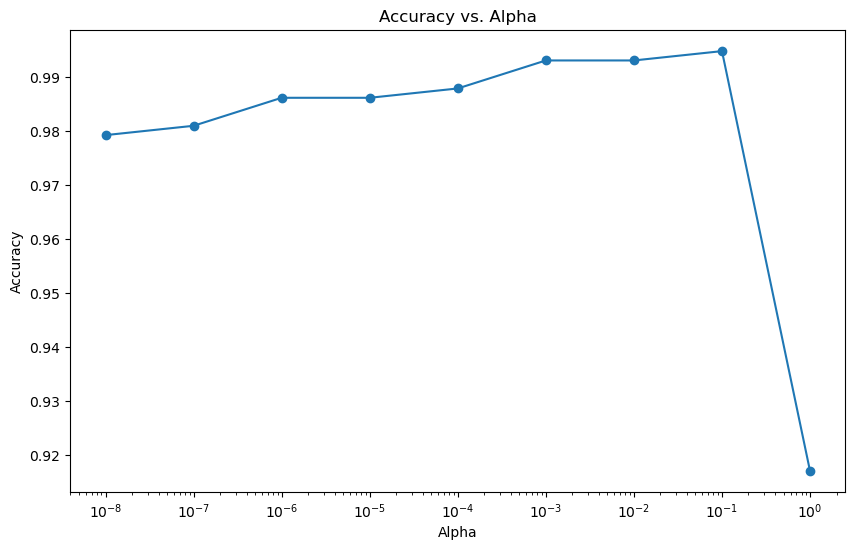

In [42]:
plt.figure(figsize=(10, 6))
plt.plot(alpha_values, accuracy1, marker='o')
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Alpha')
plt.show()